# Task 1 Supervised Machine Learning

- In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.
   

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Importing Dataset

In [2]:
path='http://bit.ly/w-data'
data=pd.read_csv(path)
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
data.shape #Getting the dimensions of the data

(25, 2)

In [4]:
data.isnull().sum() #Checking for null entries

Hours     0
Scores    0
dtype: int64

In [5]:
data.info() #Gets all the information about the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [6]:
data.describe() #Gets all the statistical information of the data

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# Visualising The Data

# Scatter plot to check the relationship between Hours and Scores

Text(0, 0.5, 'Scores')

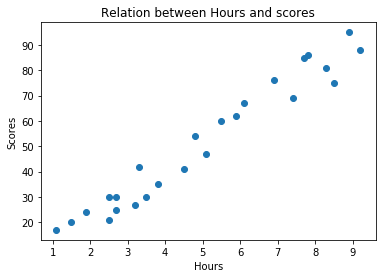

In [7]:
plt.scatter(x=data['Hours'],y=data['Scores'])
plt.title('Relation between Hours and scores')
plt.xlabel('Hours')
plt.ylabel('Scores')

- From the above graph,we can see that there is a positive linear relation between hours studied and scores secured 

# Preparing The Data

In [8]:
x=data[['Hours']].values 
y=data[['Scores']].values

In [9]:
x

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [10]:
y

array([[21],
       [47],
       [27],
       [75],
       [30],
       [20],
       [88],
       [60],
       [81],
       [25],
       [85],
       [62],
       [41],
       [42],
       [17],
       [95],
       [30],
       [24],
       [67],
       [69],
       [30],
       [54],
       [35],
       [76],
       [86]], dtype=int64)

# Splitting The Data

In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((20, 1), (5, 1), (20, 1), (5, 1))

- Splitting the Data into 80% of training and 20% of testing datasets

# Training The Algorithm

In [12]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Text(0, 0.5, 'Scores')

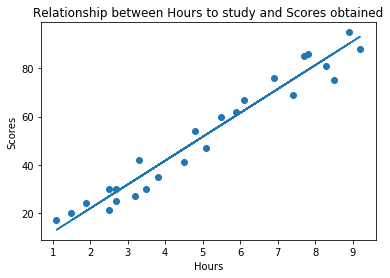

In [13]:
# Plotting the regression line
line = regressor.coef_*x+regressor.intercept_

# Plotting for the test data
plt.scatter(x, y)
plt.plot(x, line);
plt.title('Relationship between Hours to study and Scores obtained')
plt.xlabel('Hours')
plt.ylabel('Scores')

# Making Predictions

In [14]:
y_pred=regressor.predict(x_test) #Predicting the scores
y_pred #Predicted values

array([[16.88414476],
       [33.73226078],
       [75.357018  ],
       [26.79480124],
       [60.49103328]])

In [15]:
y_test #Actual values

array([[20],
       [27],
       [69],
       [30],
       [62]], dtype=int64)

In [16]:
print('Training score :',regressor.score(x_train,y_train))
print('Testing score :',regressor.score(x_test,y_test))

Training score : 0.9515510725211553
Testing score : 0.9454906892105354


In [17]:
# You can also test with your own data
hour=np.array(9.25).reshape(1,-1)
print('No.of hours :',hour)
print('Predicted score :',regressor.predict(hour))

No.of hours : [[9.25]]
Predicted score : [[93.69173249]]


In [18]:
print('Predicted score with 9.25 hours of study is {0:.2f}'.format(regressor.predict(hour)[0][0]))

Predicted score with 9.25 hours of study is 93.69


# Evaluating The Model

In [19]:
from sklearn import metrics  
print('MAE: ',metrics.mean_absolute_error(y_test, y_pred))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE:  4.183859899002982
RMSE:  4.647447612100373


# Conclusion

After applying the Simple Linear Regression algorithm,we draw the following conclusions:

- The mean absolute error is 4.18
- The root mean squared error of the predictions is 4.65
- The predicted score of a student who studies for 9.25 hours is 93.69 